# Time series analysis on the data International Airline passengers from 1940 to 1960

In [23]:
#!pip install statsmodels

In [24]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
# load the data
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
df.shape

(144, 2)

<Axes: xlabel='Month', ylabel='#Passengers'>

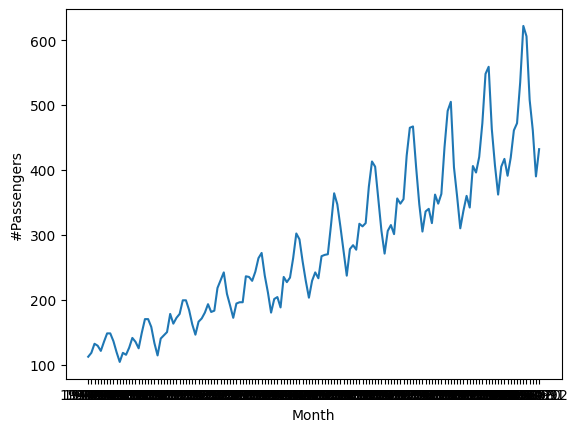

In [27]:
# plot this data to see trends and seasonality with seaborn
sns.lineplot(x="Month", y="#Passengers", data=df)

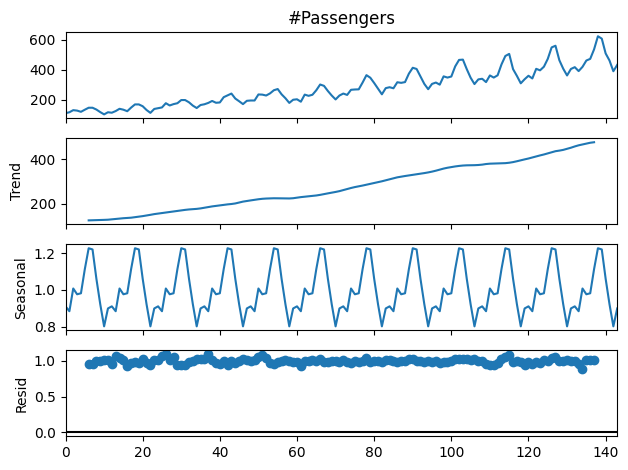

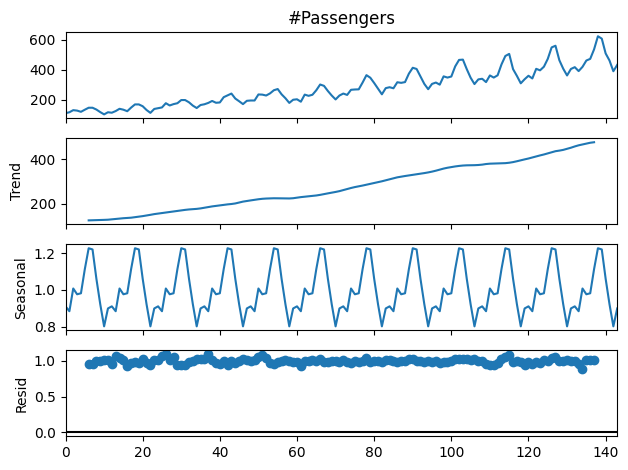

In [28]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df["#Passengers"], model="multiplicative", period=12)
decompose.plot()

<Axes: >

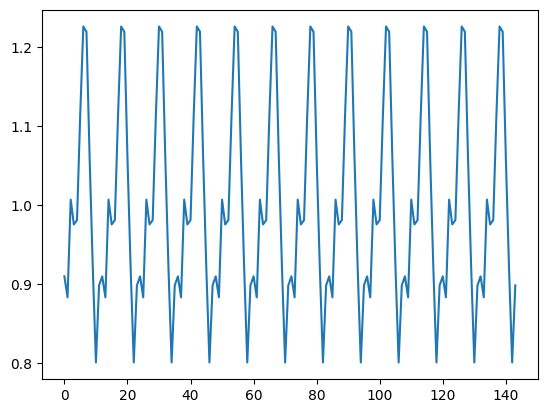

In [29]:
decompose.seasonal.plot()

In [30]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

In [31]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 152432.3750 - root_mean_squared_error: 390.2377  
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91713.3750 - root_mean_squared_error: 302.4933  
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54820.8594 - root_mean_squared_error: 232.8978 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25924.7188 - root_mean_squared_error: 160.6246 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14201.2734 - root_mean_squared_error: 118.5099 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5646.6719 - root_mean_squared_error: 74.8885 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3229.7095 - root_mean_squared_error: 56.1218 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1592.5829 - root_mean_squared_error: 39.7731 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1095.9756 - root_mean_squared_error: 33.0752 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s

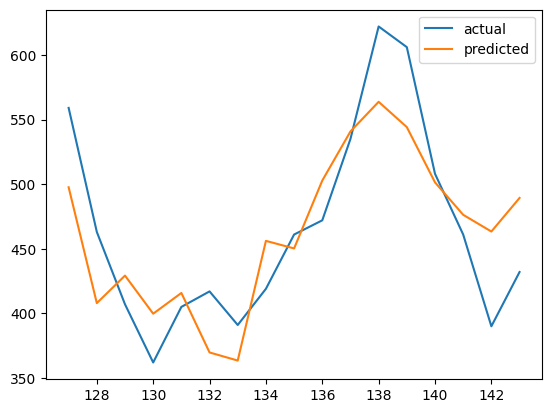

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["#Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["#Passengers"].values[n_lags:])
X_test = np.array([test["#Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["#Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["#Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()